# Model Notebook

## Import The Necessary Libraries ##

In [2]:
import cv2
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

# Extract Data from Dataset

In [3]:
fldr="/content/Age&Gender Detector/UTKFace"

In [4]:
import os
files=os.listdir(fldr)

# Create List of Images From Dataset

In [5]:
ages=[]
genders=[]
images=[]


for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  total=fldr+'/'+fle
  print(total)
  image=cv2.imread(total)

  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=cv2.resize(image,(48,48))
  images.append(image)



Streaming output truncated to the last 5000 lines.
/content/Age&Gender Detector/UTKFace/31_1_1_20170116023825964.jpg.chip.jpg
/content/Age&Gender Detector/UTKFace/37_0_4_20170104201910626.jpg.chip.jpg
/content/Age&Gender Detector/UTKFace/35_1_1_20170112215224384.jpg.chip.jpg
/content/Age&Gender Detector/UTKFace/75_1_0_20170110181054680.jpg.chip.jpg
/content/Age&Gender Detector/UTKFace/25_0_1_20170113150701015.jpg.chip.jpg
/content/Age&Gender Detector/UTKFace/29_1_1_20170114024847193.jpg.chip.jpg
/content/Age&Gender Detector/UTKFace/24_1_4_20170103235745076.jpg.chip.jpg
/content/Age&Gender Detector/UTKFace/36_0_3_20170119183659343.jpg.chip.jpg
/content/Age&Gender Detector/UTKFace/33_1_3_20170104235051234.jpg.chip.jpg
/content/Age&Gender Detector/UTKFace/39_0_0_20170104205320147.jpg.chip.jpg
/content/Age&Gender Detector/UTKFace/32_0_1_20170113135328377.jpg.chip.jpg
/content/Age&Gender Detector/UTKFace/38_0_1_20170116233242125.jpg.chip.jpg
/content/Age&Gender Detector/UTKFace/56_1_0_20170

# Create List of Age & Gender From dataset

In [6]:
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

# Viewing a Sample

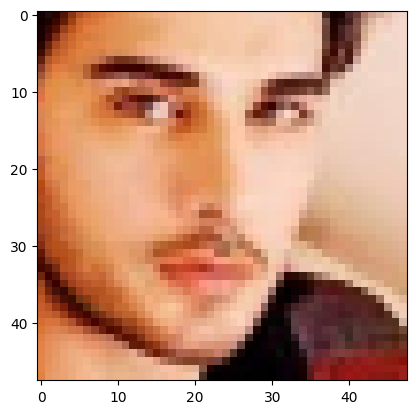

In [7]:
plt.imshow(images[0])

In [8]:
print(ages[0])

23


In [9]:
print(genders[0])

0


In [ ]:
saving ages array, images array, gender array in the system

In [10]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [11]:
np.save(fldr+'images.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

# Finding the no. of Male and Female Samples

In [12]:

values, counts=np.unique(genders_f,return_counts=True)
print(counts)


[12391 11317]


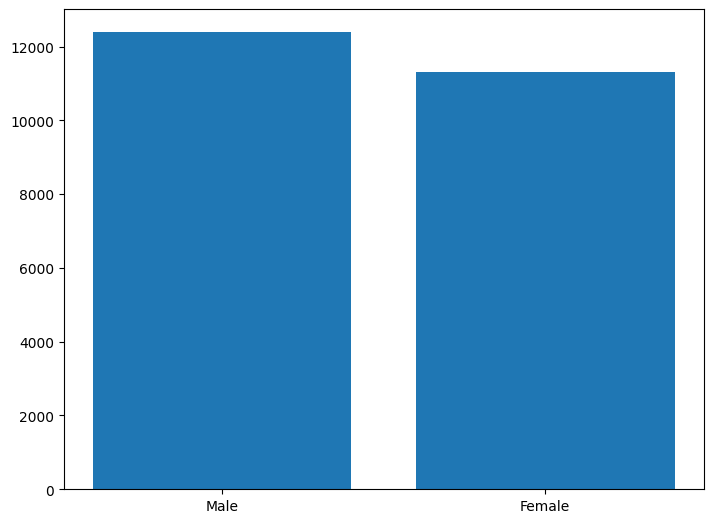

In [13]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391 ,11317]
ax.bar(gender,values)
plt.show()

In [14]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


# Converting Age count to list

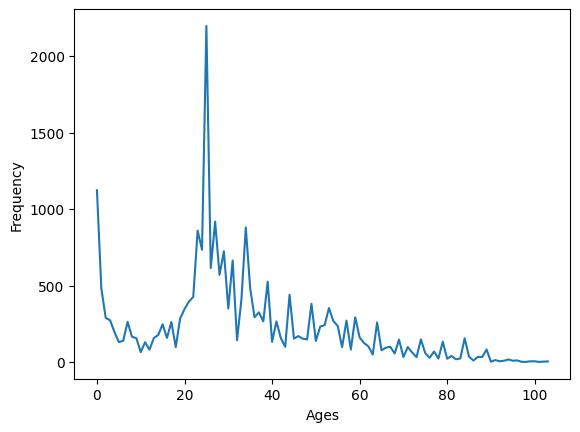

In [15]:
val=values.tolist()
cnt=counts.tolist()
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

# Defining Labels For Output

In [16]:
labels=[]
i=0
while i<len(ages):
  label=[]
  label.append(ages[i])
  label.append(genders[i])
  labels.append(label)
  i=i+1

In [17]:
images_f_2=images_f/255

In [18]:
images_f_2.shape

(23708, 48, 48, 3)

In [19]:
labels_f=np.array(labels)

In [ ]:
Splitting Dataset Into test and train

In [20]:
from sklearn.model_selection import train_test_split


In [21]:

X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size=0.25)


In [22]:
Y_train[0:5]

array([[45,  0],
       [29,  0],
       [78,  0],
       [26,  0],
       [75,  0]])

In [23]:
X_train[0:5]

array([[[[0.56862745, 0.47843137, 0.41568627],
         [0.55294118, 0.44705882, 0.38039216],
         [0.56078431, 0.43137255, 0.36470588],
         ...,
         [0.58823529, 0.77647059, 0.34509804],
         [0.74117647, 0.8627451 , 0.47058824],
         [0.67058824, 0.75686275, 0.39215686]],

        [[0.58039216, 0.49019608, 0.42745098],
         [0.5372549 , 0.43137255, 0.36470588],
         [0.59215686, 0.4627451 , 0.39607843],
         ...,
         [0.47058824, 0.67058824, 0.30196078],
         [0.57647059, 0.7254902 , 0.33333333],
         [0.58431373, 0.69411765, 0.30196078]],

        [[0.52941176, 0.43921569, 0.37647059],
         [0.49803922, 0.39607843, 0.32941176],
         [0.61568627, 0.48627451, 0.41960784],
         ...,
         [0.56470588, 0.7254902 , 0.41568627],
         [0.43529412, 0.56078431, 0.22352941],
         [0.43921569, 0.55294118, 0.16470588]],

        ...,

        [[0.59607843, 0.40784314, 0.35294118],
         [0.8       , 0.62352941, 0.58039216]

In [24]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [25]:
Y_train_2[0][0:5]

array([0, 0, 0, 0, 0])

In [26]:
Y_train_2[0][0:5]

array([0, 0, 0, 0, 0])

# Definig The Model

In [27]:
def Convolution(input_tensor,filters):
  from keras.regularizers import l2 # This import should be done at the top of the file
  x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor) # Changed 12 to l2
  x=Dropout(0.1)(x)
  x=Activation('relu')(x)
  return x


In [28]:
pip install keras
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation
from keras.models import Model

def Convolution(input_tensor,filters):
  from keras.regularizers import l2
  x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
  x=Dropout(0.1)(x)
  x=Activation('relu')(x)
  return x

def model(input_shape):
  inputs=Input((input_shape))
  conv_1=Convolution(inputs,32)
  maxp_1=MaxPool2D(pool_size=(2,2))(conv_1)
  conv_2=Convolution(maxp_1,64)
  maxp_2=MaxPool2D(pool_size=(2,2))(conv_2)
  conv_3=Convolution(maxp_2,128)
  maxp_3=MaxPool2D(pool_size=(2,2))(conv_3)
  conv_4=Convolution(maxp_3,256)
  maxp_4=MaxPool2D(pool_size=(2,2))(conv_4)
  flatten=Flatten()(maxp_4)
  dense_1=Dense(64,activation='relu')(flatten)
  dense_2=Dense(64,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
  output_2=Dense(1,activation='relu',name='age_output')(drop_2)
  model_=Model(inputs=inputs,outputs=[output_1,output_2])
  model_.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=[['accuracy'], ['accuracy']])
  return model_

In [29]:
Model=model((48,48,3))

In [30]:
Model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 48, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 48, 48, 32)     │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 48, 48, 32)     │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 48, 48, 32)     │              0 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 24, 24, 32)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 24, 24, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 24, 24, 64)     │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 24, 24, 64)     │              0 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 12, 12, 64)     │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 12, 12, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 12, 12, 128)    │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 12, 12, 128)    │              0 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 6, 6, 128)      │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 6, 6, 256)      │        295,168 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 6, 6, 256)      │              0 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 6, 6, 256)      │              0 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 3, 3, 256)      │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)    

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Initializing The Model

In [32]:
fle_s="Age_Gender_Dectection.keras"
checkpoint=ModelCheckpoint(fle_s,monitor="val_loss",save_best_only=True,save_weights_only=False,mode="auto",save_freq="epoch")
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor="val_loss",restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

# Running The Model

In [33]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=30,callbacks=callback_list)

Epoch 1/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 176s 620ms/step - age_output_accuracy: 0.0425 - loss: 19.9361 - sex_out_accuracy: 0.5307 - val_age_output_accuracy: 0.0459 - val_loss: 17.1913 - val_sex_out_accuracy: 0.5301
Epoch 2/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 193s 588ms/step - age_output_accuracy: 0.0479 - loss: 15.8485 - sex_out_accuracy: 0.5228 - val_age_output_accuracy: 0.0434 - val_loss: 18.4028 - val_sex_out_accuracy: 0.5299
Epoch 3/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 210s 620ms/step - age_output_accuracy: 0.0432 - loss: 13.1275 - sex_out_accuracy: 0.5643 - val_age_output_accuracy: 0.0439 - val_loss: 11.3235 - val_sex_out_accuracy: 0.7341
Epoch 4/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 202s 621ms/step - age_output_accuracy: 0.0455 - loss: 11.1297 - sex_out_accuracy: 0.6886 - val_age_output_accuracy: 0.0459 - val_loss: 12.3385 - val_sex_out_accuracy: 0.7721
Epoch 5/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 191s 583ms/step - age_output_accuracy: 0.0438 - loss: 10.3835 - sex_out_accuracy: 0.7500 - val_age_outpu

# Model Evaluation

In [34]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - age_output_accuracy: 0.0402 - loss: 7.5423 - sex_out_accuracy: 0.8866


[7.644505500793457, 0.04589168354868889, 0.8861144185066223]

In [35]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step


In [36]:
pred[1]

array([[54.317394],
       [33.27986 ],
       [31.52969 ],
       ...,
       [18.436016],
       [20.579016],
       [27.44779 ]], dtype=float32)

# Plotting Loss

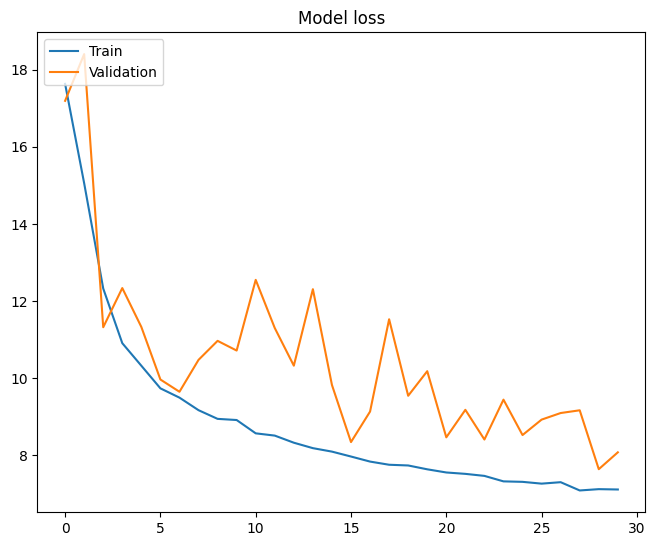

In [39]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.xlabel=('Epochs')
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# Plotting Sex Accuracy

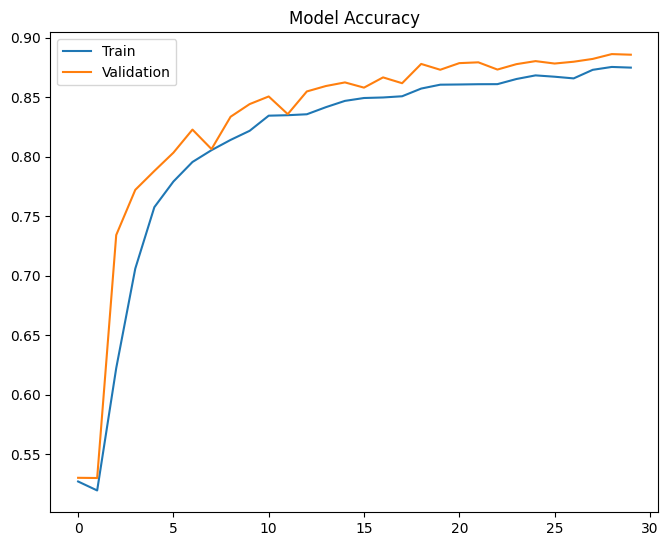

In [40]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epochs')
plt.ylabel=('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# Plotting Age Accuracy

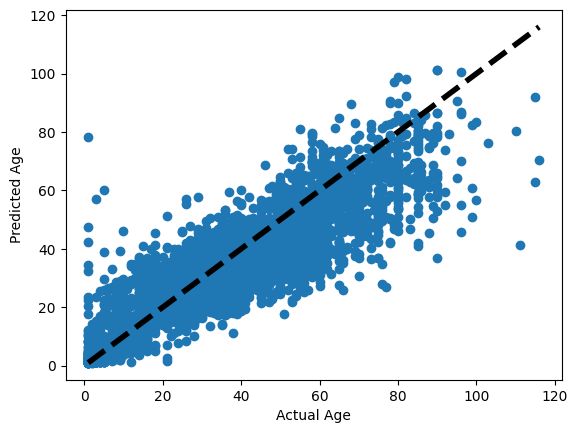

In [44]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

# Making Report of the Model (Gender Only)

In [46]:
i=0
Pred_l=[]
while(i<len(pred[0])):
  Pred_l.append(int(np.round(pred[0][i])))
  i=i+1

<ipython-input-46-a4b9f664b7d1>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [48]:
report=classification_report(Y_test_2[0],Pred_l)

In [49]:
print(report)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3142
           1       0.86      0.90      0.88      2785

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



# Making Heatmap of the Model(Gender Only)

In [50]:
result=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

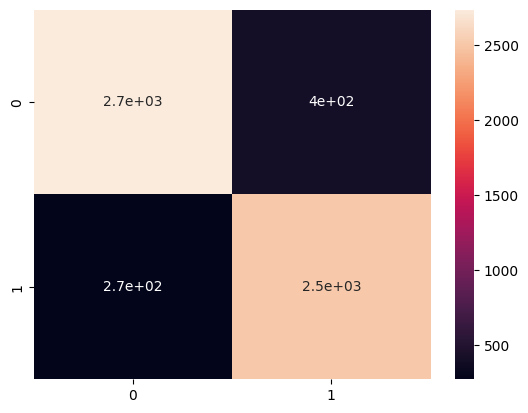

In [52]:
import seaborn as sns
sns.heatmap(result,annot=True)

# Testing The Images ourself

In [57]:
def test_image(ind,images_f,images_f_2,Model):
  plt.imshow(images_f[ind])
  images_test=images_f_2[ind]
  Pred_l=Model.predict(np.array([images_test]))
  sex_f=['Male','Female']
  age=int(np.round(Pred_l[1][0]))
  sex=int(np.round(Pred_l[0][0]))
  print("Predicted Age is: "+ str(age))
  print("Predicted Sex is: "+ sex_f[sex])

# Test 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Age is: 17
Predicted Sex is: Female


<ipython-input-57-0bf789596066>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
<ipython-input-57-0bf789596066>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


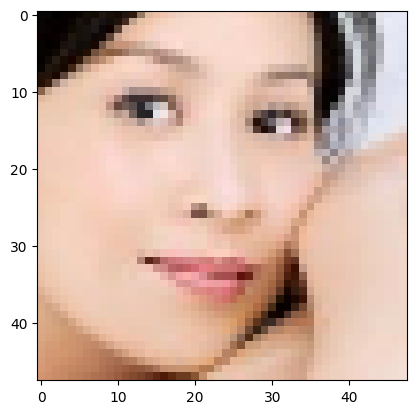

In [58]:
test_image(4,images_f,images_f_2,Model)

# Test 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Age is: 43
Predicted Sex is: Male


<ipython-input-57-0bf789596066>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
<ipython-input-57-0bf789596066>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


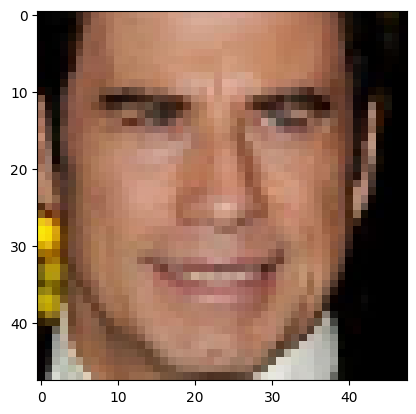

In [59]:
test_image(44,images_f,images_f_2,Model)

# Test 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Age is: 58
Predicted Sex is: Male


<ipython-input-57-0bf789596066>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
<ipython-input-57-0bf789596066>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


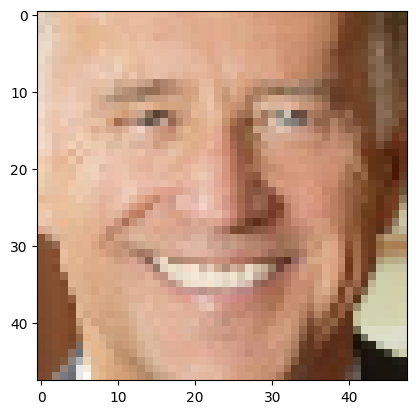

In [60]:
test_image(365,images_f,images_f_2,Model)

# Test 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Age is: 32
Predicted Sex is: Male


<ipython-input-57-0bf789596066>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
<ipython-input-57-0bf789596066>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


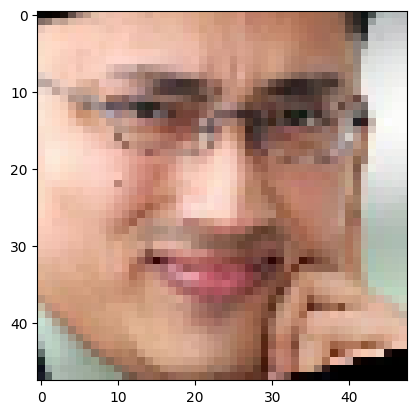

In [61]:
test_image(889,images_f,images_f_2,Model)

# Test 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Age is: 27
Predicted Sex is: Female


<ipython-input-57-0bf789596066>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
<ipython-input-57-0bf789596066>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


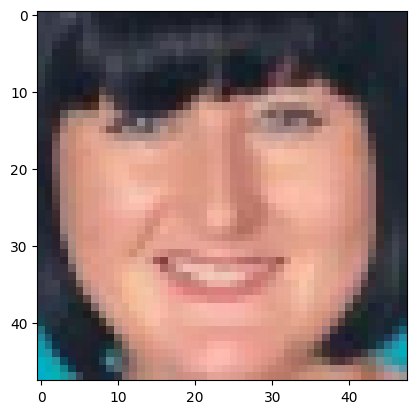

In [62]:
test_image(94,images_f,images_f_2,Model)

# Test 6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Age is: 20
Predicted Sex is: Male


<ipython-input-57-0bf789596066>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
<ipython-input-57-0bf789596066>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


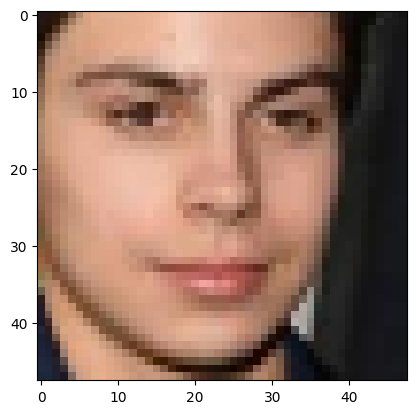

In [63]:
test_image(404,images_f,images_f_2,Model)

# Test 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Age is: 24
Predicted Sex is: Female


<ipython-input-57-0bf789596066>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
<ipython-input-57-0bf789596066>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


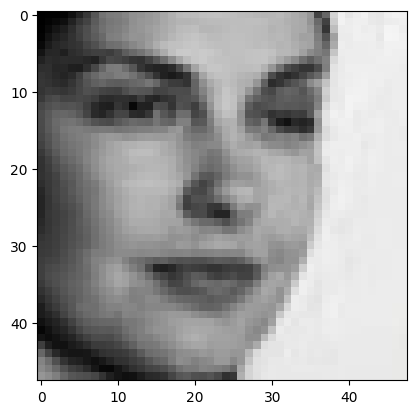

In [64]:
test_image(54,images_f,images_f_2,Model)

# Test 8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Age is: 26
Predicted Sex is: Male


<ipython-input-57-0bf789596066>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(Pred_l[1][0]))
<ipython-input-57-0bf789596066>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(Pred_l[0][0]))


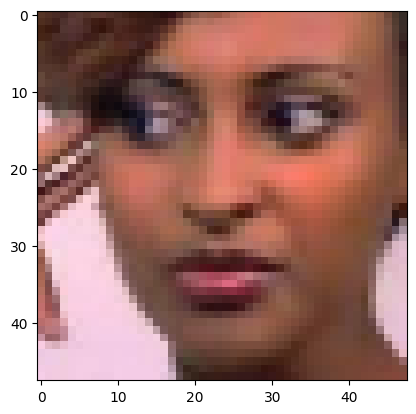

In [65]:
test_image(987,images_f,images_f_2,Model)